In [1]:
import os
os.getcwd()
import matplotlib as plt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[*********************100%%**********************]  7 of 7 completed


C:\Users\Aliko\AppData\Local\Temp\ipykernel_14044\3064280878.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_returns = closing_prices.pct_change()


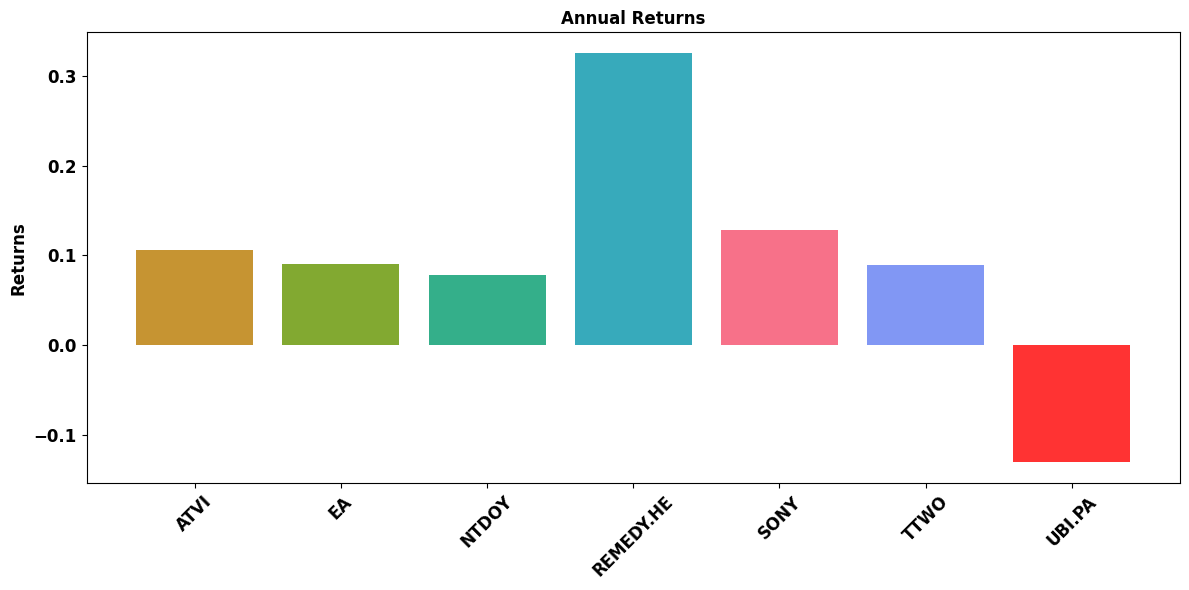

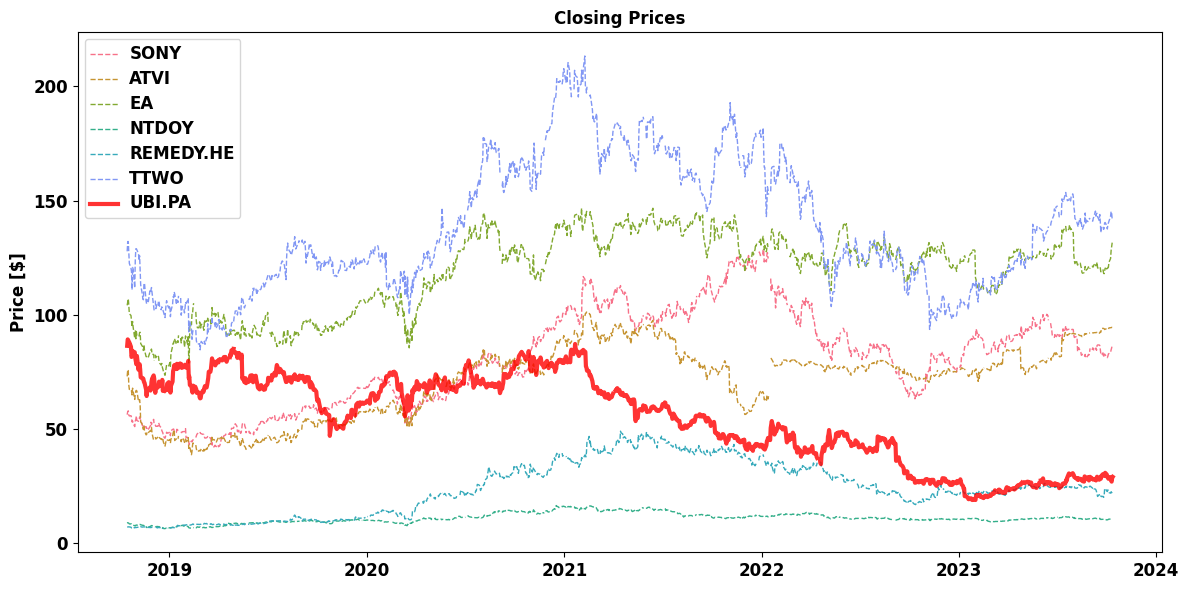

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Define a list of technology companies in the game industry
tech_companies = ['SONY', 'ATVI', 'EA', 'NTDOY', 'REMEDY.HE', 'TTWO']

# Add Ubisoft separately with a distinct color
companies = tech_companies + ['UBI.PA']  # Ubisoft's ticker symbol

# Generate a custom color palette with different colors for each company
colors = sns.color_palette("husl", len(companies))

# Create a dictionary to store the colors for each company
company_colors = {company: color for company, color in zip(companies, colors)}

# Find the index of Ubisoft in the list
ubi_index = companies.index('UBI.PA')

# Set Ubisoft's color to red with high alpha
company_colors['UBI.PA'] = (1.0, 0.0, 0.0, 0.8)

# Download historical stock data
data = yf.download(companies, period="5y")

# Create a DataFrame with the closing prices
closing_prices = data['Adj Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Calculate annual returns
annual_returns = daily_returns.mean() * 252

# Create a bar plot for annual returns
plt.figure(figsize=(12, 6))
bar_colors = [company_colors[company] for company in annual_returns.index]
plt.bar(annual_returns.index, annual_returns, color=bar_colors)
plt.title("Annual Returns",fontsize=12, fontweight='bold')
plt.ylabel("Returns", fontsize=12, fontweight='bold')

# Increase font size and set weight to 'bold' for ticks on both x and y axes
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('return.png', dpi=300)
plt.show()

# Create a line plot for closing prices
plt.figure(figsize=(12, 6))
for company in companies:
    line_color = company_colors[company]
    line_width = 3 if company == 'UBI.PA' else 1  # Set line width for Ubisoft to 3, others to 1
    line_style = '--' if company != 'UBI.PA' else '-'  # Set line style to dashed for others, solid for Ubisoft
    plt.plot(closing_prices.index, closing_prices[company], label=company, color=line_color, linewidth=line_width, linestyle=line_style)

plt.title("Closing Prices",fontsize=12, fontweight='bold')
plt.ylabel("Price [$]",fontsize=12, fontweight='bold')

# Increase font size and set weight to 'bold' for ticks on both x and y axes
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(12)
    text.set_fontweight('bold')
plt.tight_layout()

# Show the plots
plt.savefig('stock_prices.png', dpi=300)
plt.show()


[*********************100%%**********************]  7 of 7 completed


C:\Users\Aliko\AppData\Local\Temp\ipykernel_14044\241683264.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_returns = closing_prices.pct_change()


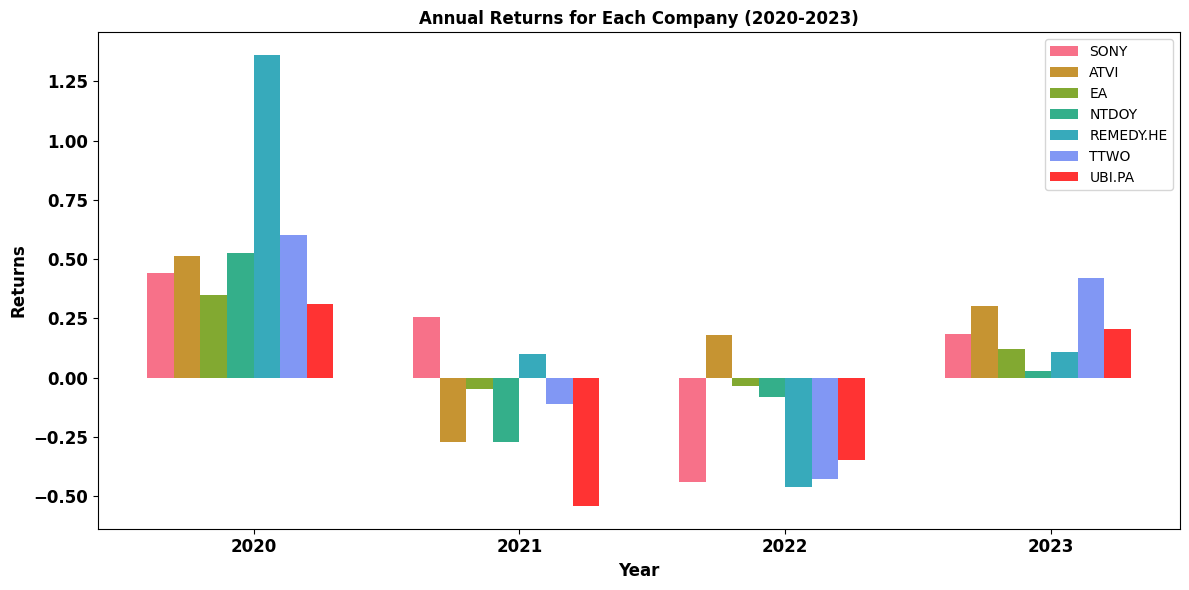

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np

# Define a list of technology companies in the game industry
tech_companies = ['SONY', 'ATVI', 'EA', 'NTDOY', 'REMEDY.HE', 'TTWO']

# Add Ubisoft separately with a distinct color
companies = tech_companies + ['UBI.PA']  # Ubisoft's ticker symbol

# Generate a custom color palette with different colors for each company
colors = sns.color_palette("husl", len(companies))

# Create a dictionary to store the colors for each company
company_colors = {company: color for company, color in zip(companies, colors)}

# Find the index of Ubisoft in the list
ubi_index = companies.index('UBI.PA')

# Set Ubisoft's color to red with high alpha
company_colors['UBI.PA'] = (1.0, 0.0, 0.0, 0.8)

# Download historical stock data
data = yf.download(companies, period="5y")

# Create a DataFrame with the closing prices
closing_prices = data['Adj Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change()

# Calculate annual returns for each year
annual_returns = daily_returns.groupby(daily_returns.index.year).mean() * 252

# Filter annual returns for the years 2020, 2021, 2022, and 2023
years_to_plot = [2020, 2021, 2022, 2023]
filtered_annual_returns = annual_returns.loc[annual_returns.index.isin(years_to_plot)]

# Create a bar plot for each company for the specified years
plt.figure(figsize=(12, 6))
bar_width = 0.1  # Adjust the bar width to make it slightly thinner
years = filtered_annual_returns.index  # List of years

for i, company in enumerate(companies):
    annual_data = filtered_annual_returns[company]
    positions = np.arange(len(years)) + i * bar_width
    bar_colors = [company_colors[company] for _ in range(len(annual_data))]
    plt.bar(positions, annual_data, bar_width, label=company, color=bar_colors)

plt.title("Annual Returns for Each Company (2020-2023)", fontsize=12, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Returns", fontsize=12, fontweight='bold')

# Increase font size and set weight to 'bold' for ticks on both x and y axes
plt.xticks(np.arange(len(years)) + bar_width * (len(companies) / 2), years, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Create a legend
plt.legend()

plt.tight_layout()
plt.savefig('annual_returns.png', dpi=300)
plt.show()


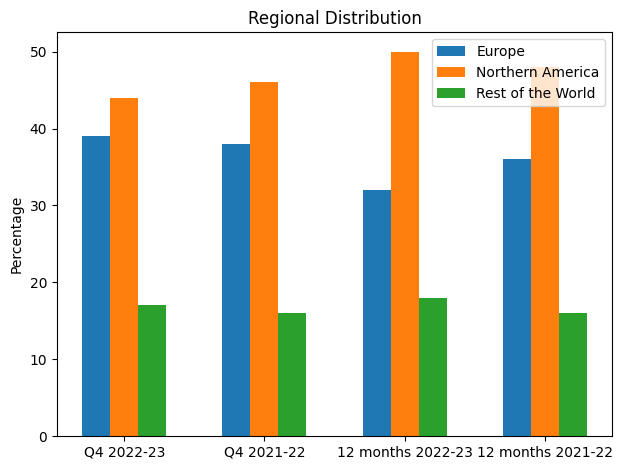

In [75]:
import matplotlib.pyplot as plt

# Data
categories = ['Q4 2022-23', 'Q4 2021-22', '12 months 2022-23', '12 months 2021-22']
europe_data = [39, 38, 32, 36]
na_data = [44, 46, 50, 48]
rest_of_world_data = [17, 16, 18, 16]

# Bar width
bar_width = 0.2

# X-axis positions for the bars
x = range(len(categories))

# Create subplots
fig, ax = plt.subplots()

# Create bars
europe_bars = plt.bar(x, europe_data, width=bar_width, label='Europe', align='center')
na_bars = plt.bar([i + bar_width for i in x], na_data, width=bar_width, label='Northern America', align='center')
rest_of_world_bars = plt.bar([i + 2*bar_width for i in x], rest_of_world_data, width=bar_width, label='Rest of the World', align='center')

# Set X-axis labels
plt.xticks([i + bar_width for i in x], categories)

# Set Y-axis label
plt.ylabel('Percentage')

# Set title
plt.title('Regional Distribution')

# Add a legend
plt.legend()

# Display the graph
plt.tight_layout()
plt.savefig('regions.png', dpi=300)

plt.show()


C:\Users\Aliko\AppData\Local\Temp\ipykernel_14044\446954606.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


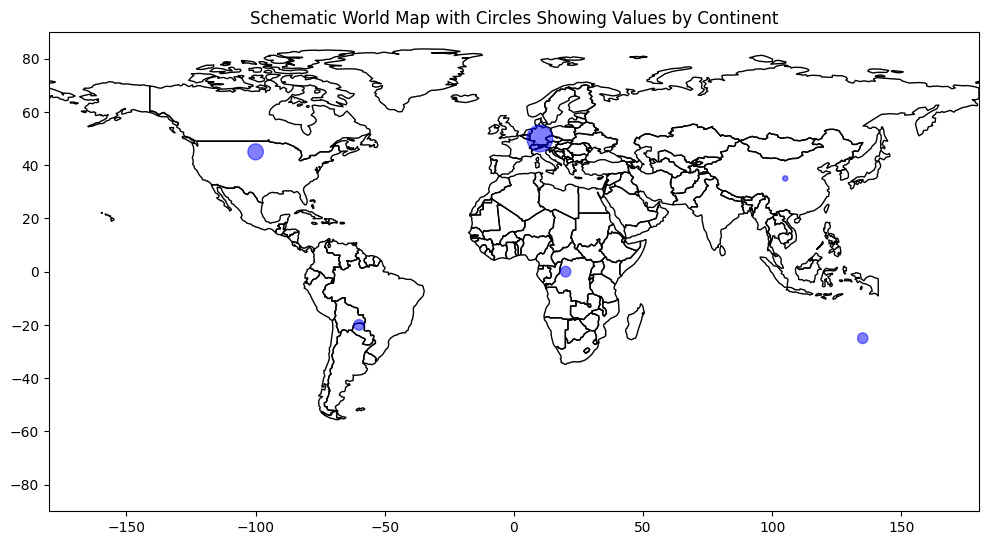

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the continent-only shapefile
continents = gpd.read_file('path_to_continent_shapefile.shp')

# Sample data for continents (values and coordinates)
data = {
    'Asia': {'value': 1, 'lat': 35, 'lon': 105},
    'Africa': {'value': 2, 'lat': 0, 'lon': 20},
    'Europe': {'value': 5, 'lat': 50, 'lon': 10},
    'North America': {'value': 3, 'lat': 45, 'lon': -100},
    'South America': {'value': 150, 'lat': -20, 'lon': -60},
    'Australia': {'value': 80, 'lat': -25, 'lon': 135},
}

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Plot continents with no boundaries
continents.boundary.plot(ax=ax, color='none', linewidth=1)

# Plot circles on continents with sizes corresponding to values
for continent, info in data.items():
    x, y = info['lon'], info['lat']
    size = info['value']
    ax.add_patch(plt.Circle((x, y), size, color='blue', alpha=0.5))

# Set axis limits and title
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
plt.title("Schematic World Map with Circles Showing Values on Continents")

# Show the plot
plt.show()


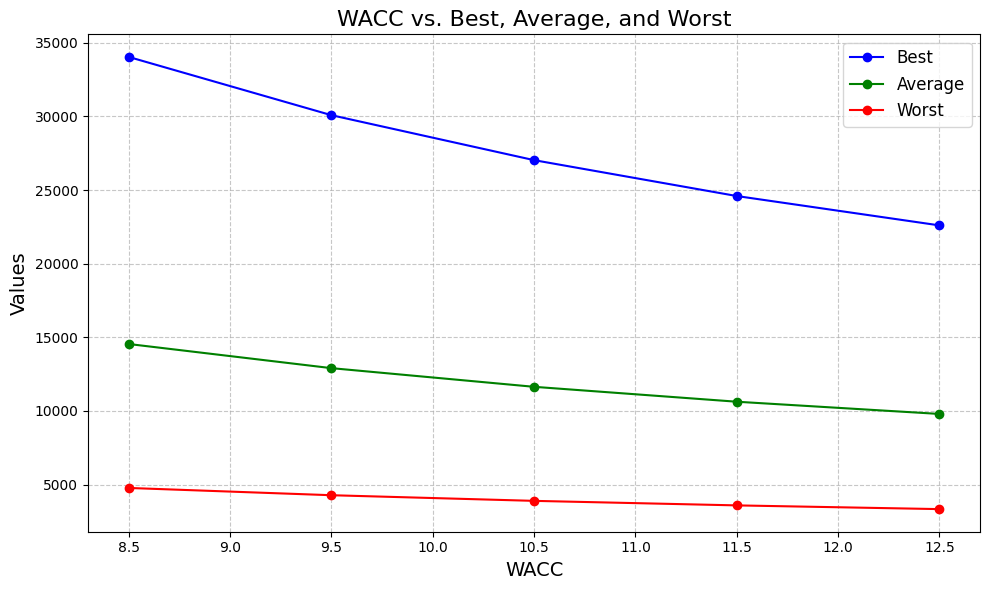

In [76]:
import matplotlib.pyplot as plt

# Define the data
wacc_values = [8.5, 9.5, 10.5, 11.5, 12.5]
best_values = [34042.60331, 30087.7576, 27033.19572, 24596.36433, 22602.23615]
average_values = [14546.58826, 12907.42496, 11639.67677, 10626.84709, 9796.768712]
worst_values = [4771.043639, 4277.24413, 3893.943452, 3586.53722, 3333.586158]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data as line plots
ax.plot(wacc_values, best_values, label="Best", marker='o', linestyle='-', color='blue')
ax.plot(wacc_values, average_values, label="Average", marker='o', linestyle='-', color='green')
ax.plot(wacc_values, worst_values, label="Worst", marker='o', linestyle='-', color='red')

# Set labels and title
ax.set_xlabel("WACC", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.set_title("WACC vs. Best, Average, and Worst", fontsize=16)

# Set legend
ax.legend(fontsize=12)

# Customize gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Aliko\AppData\Local\Temp\ipykernel_14044\2097349791.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks()])


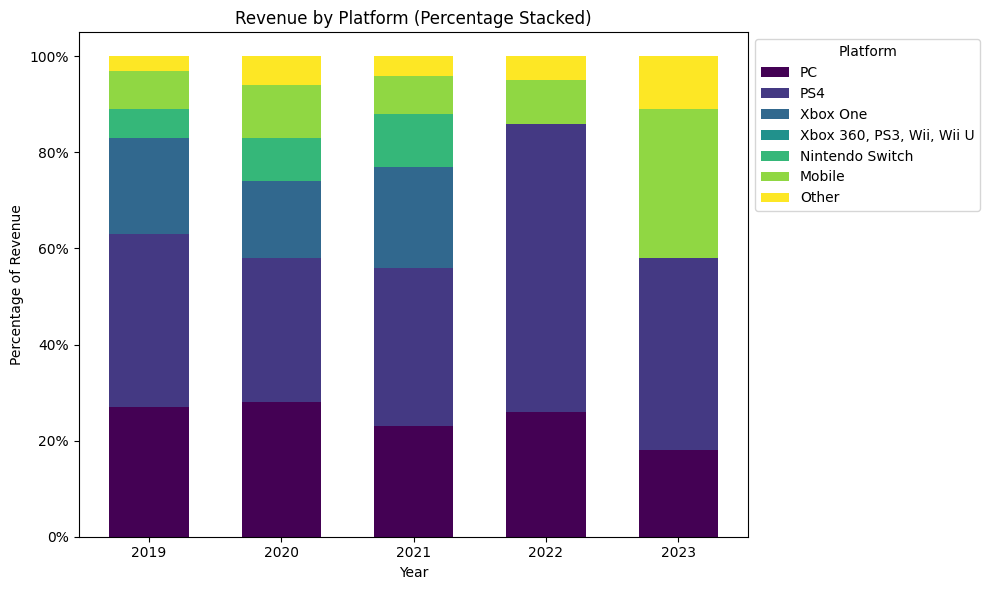

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
platforms = ["PC", "PS4", "Xbox One", "Xbox 360, PS3, Wii, Wii U", "Nintendo Switch", "Mobile", "Other"]
years = [2023,2022, 2021, 2020, 2019]
revenues = [
    [326.57, 552.55, 511.47, 446.55, 498.29],
    [725.72, 1275.12, 733.85, 478.45, 664.39],
    [0, 0, 467.00, 255.17, 369.10],
    [0, 0, 0, 0, 0],
    [0, 0, 244.62, 143.53, 110.73],
    [562.43, 191.27, 177.90, 175.43, 147.64],
    [199.57, 106.26, 88.95, 95.69, 55.37]
]

# Calculate the percentage of revenue for each platform for each year
revenues_percentage = np.array(revenues) / np.sum(revenues, axis=0) * 100

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart
bottom = np.zeros(len(years))
colors = plt.cm.viridis(np.linspace(0, 1, len(platforms)))

for i, platform in enumerate(platforms):
    ax.bar(
        years,
        revenues_percentage[i],
        width=0.6,
        label=platform,
        bottom=bottom,
        color=colors[i]
    )
    bottom += revenues_percentage[i]

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Revenue")
ax.set_title("Revenue by Platform (Percentage Stacked)")

# Set y-axis to show percentages (0-100%)
ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks()])

# Create a legend
ax.legend(title="Platform", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.savefig('consoles.png', dpi=300)

plt.show()


In [2]:
#!pip install scipy or anything else
import yfinance as yf
import pandas as pd
from scipy import stats
import numpy as np

# if you want to download data
'''
ticker_symbol = "UBI.PA"
sp500_symbol = "^GSPC"

start_date = "2020-01-01"
end_date = "2023-10-01"

# Download historical stock price data
ubisoft_data = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500_data = yf.download(sp500_symbol, start=start_date, end=end_date)

desktop_path = "~/Desktop"  .
file_path = f"{desktop_path}/{file_name}"
file_path2 = f"{desktop_path}/{file_nameSP}"
file_name = "ubisoft_stock_data.xlsx"
file_nameSP = "SP500.xlsx"
ubisoft_data.to_excel(file_path)
sp500_data.to_excel(file_path2)
print(ubisoft_data.head())
print(f"Data saved as {file_path}")
ubisoft_info = yf.Ticker(ticker_symbol)
ubisoft_info.info
'''


'\nticker_symbol = "UBI.PA"\nsp500_symbol = "^GSPC"\n\nstart_date = "2020-01-01"\nend_date = "2023-10-01"\n\n# Download historical stock price data\nubisoft_data = yf.download(ticker_symbol, start=start_date, end=end_date)\nsp500_data = yf.download(sp500_symbol, start=start_date, end=end_date)\n\ndesktop_path = "~/Desktop"  .\nfile_path = f"{desktop_path}/{file_name}"\nfile_path2 = f"{desktop_path}/{file_nameSP}"\nfile_name = "ubisoft_stock_data.xlsx"\nfile_nameSP = "SP500.xlsx"\nubisoft_data.to_excel(file_path)\nsp500_data.to_excel(file_path2)\nprint(ubisoft_data.head())\nprint(f"Data saved as {file_path}")\nubisoft_info = yf.Ticker(ticker_symbol)\nubisoft_info.info\n'

In [3]:
ubisoft_data = pd.read_excel('ubisoft_stock_data.xlsx')
sp500_data = pd.read_excel('SP500.xlsx')

In [11]:
#daily returns for Ubisoft Entertainment and the S&P 500
ubisoft_returns = ubisoft_data["Adj Close"].pct_change().dropna()
sp500_returns = sp500_data["Adj Close"].pct_change().dropna()

#covariance between Ubisoft Entertainment returns and S&P 500 returns
covariance = ubisoft_returns.cov(sp500_returns)

#variance of S&P 500 returns
market_variance = sp500_returns.var()

beta = covariance / market_variance
beta
#check with this website https://www.macroaxis.com/invest/ratio/UBI.PA/Beta
#or here https://finbox.com/ENXTPA:UBI/explorer/beta/
#(ubisoft_data.Date,ubisoft_data.Open)

0.0875910938869417

In [6]:
ubisoft_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:

risk_free_rate = 0.02  #10-year Treasury yield
market_premium = 0.06  

cost_of_equity = risk_free_rate + beta * market_premium
#cost_of_equity = 0.08  
cost_of_debt = 0.05     
tax_rate = 0.3         #  (30%)
weight_of_equity = 0.6  
weight_of_debt = 0.4   

# Calculate the WACC
wacc = (weight_of_equity * cost_of_equity) + (weight_of_debt * cost_of_debt * (1 - tax_rate))

print(f"WACC: {wacc:.4f}")


WACC: 0.0292
